In [3]:
# Example - Wine Quality Prediction 

Epoch 1/20


C:\Anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4950 - loss: 1.0156 - val_accuracy: 0.9444 - val_loss: 0.7659
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8956 - loss: 0.7511 - val_accuracy: 0.9722 - val_loss: 0.5652
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9705 - loss: 0.5493 - val_accuracy: 1.0000 - val_loss: 0.4089
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9687 - loss: 0.3917 - val_accuracy: 1.0000 - val_loss: 0.2895
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9592 - loss: 0.2979 - val_accuracy: 1.0000 - val_loss: 0.2060
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9646 - loss: 0.2191 - val_accuracy: 1.0000 - val_loss: 0.1465
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9845 - loss: 0.1683 - val_accuracy: 1.0000 - val_loss: 0.1069
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9868 - loss: 0.1382 - val_accuracy: 1.0000 - val_loss: 0.0804
Epoch 9/20


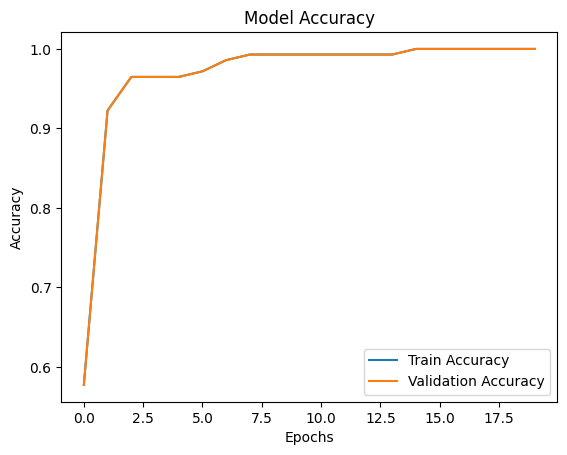

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: 0, Actual Class: 0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

data = load_wine()
x,y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

sample_input = np.expand_dims(x_test[0], axis=0)
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')